In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch

import matplotlib as mpl
# mpl.rcParams['text.usetex'] = True # Enable LaTeX rendering

np.random.seed(1)

In [2]:
def get_tau(z, alpha, T=1000, epsilon=1e-20):
    z = (alpha - 1) * z
    
    z_max = z.max().item()
    d = z.size(0)
    tau_min = z_max - 1
    tau_max = z_max - d ** (1 - alpha)
    
    def p(tau):
        return torch.clamp(z - tau, min=0) ** (1 / (alpha - 1))
    
    # bisection method to find tau
    for _ in range(T):
        tau = (tau_min + tau_max) / 2
        Z = p(tau).sum().item()
        
        if Z < 1:
            tau_max = tau
        else:
            tau_min = tau
        
        if abs(Z - 1) < epsilon:
            break
    
    return tau

def alpha_entmax(z, alpha):
    tau = get_tau(z, alpha)
    return torch.clamp((alpha - 1)*z - tau, min=0) ** (1 / (alpha - 1))

In [3]:
# generate Q-values
Q_values = (10 * np.random.rand(1, 6)).astype(int).flatten() + 1
# generate actions
actions = [i for i in 'ABCDEF']

In [4]:
λ = 4
α = 2

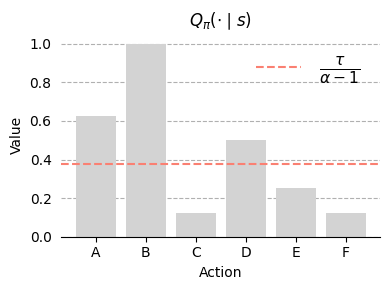

In [5]:
fig, ax = plt.subplots(figsize=(4, 3))

tau = get_tau(torch.tensor(Q_values/(α * λ)), α)
threshold = tau/(α - 1)

plt.bar(actions, Q_values/(α * λ), color='lightgray', zorder=2)
plt.axhline(y=threshold, color='salmon', linestyle='--', label=r'$\frac{\tau}{\alpha - 1}$')

ax.spines[['right', 'top', 'left']].set_visible(False)
ax.grid(which='major', axis='y', linestyle='--', zorder=0)
plt.tick_params(left = False)

plt.title(r'$Q_{\pi}(\cdot \mid s)$')
plt.ylabel('Value')
plt.xlabel('Action')
plt.legend(frameon=False, fontsize=16)

plt.tight_layout()
plt.savefig('q_values.pdf')

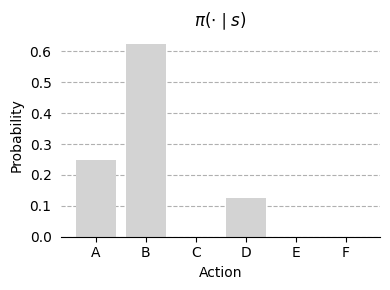

In [6]:
fig, ax = plt.subplots(figsize=(4, 3))

plt.bar(actions, alpha_entmax(torch.tensor(Q_values/(α * λ)).float(), α), color='lightgray', zorder=2)

ax.spines[['right', 'top', 'left']].set_visible(False)
ax.grid(which='major', axis='y', linestyle='--', zorder=0)
plt.tick_params(left = False)

plt.title(r'$\pi(\cdot \mid s)$')
plt.ylabel('Probability')
plt.xlabel('Action')

plt.tight_layout()
plt.savefig('sparse_policy.pdf')